<a href="https://colab.research.google.com/github/sumguyneedz/ACM-ICPC-Preparation/blob/master/dl_18_yes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the dependencies

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils

In [14]:
# url https://www.kaggle.com/c/digit-recognizer/data

img_train = np.loadtxt('train.csv', delimiter=',', skiprows=1)[:,:]

print("Training_data: {0}".format(img_train.shape))

X_train = np.array(img_train[:,1:])

train_label = np.array(img_train[:,0])

print(X_train.shape)
print(train_label.shape)

Training_data: (42000, 785)
(42000, 784)
(42000,)


(42000, 10)
(42000, 784)


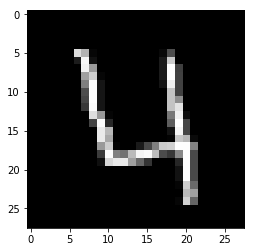

In [16]:
# rescaling of the data
# As data is already float 64 and np so no need to use type

X_train_1 = X_train/255
Y_train = np_utils.to_categorical(train_label)
print(Y_train.shape)
print(X_train_1.shape)
plt.imshow(X_train_1[3].reshape(28,28), cmap = 'gray')
plt.show()

In [0]:
# Define the placeholder
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# Create a NN of single layer having 1000 nodes using tensorflow api

n_hidden = 1000
n_output = 10 
learning_rate = 0.1

# Network model
Z1 = tf.layers.dense(X, n_hidden, activation = tf.nn.relu)
output_layer = tf.layers.dense(Z1, n_output, activation = tf.nn.softmax)

# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

# Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y, 1))

# Intialize all the variables
init = tf.global_variables_initializer()

(4072, 784)


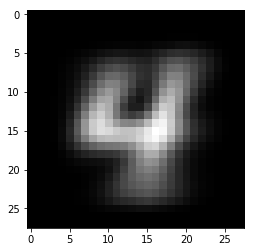

In [18]:
X_train_2 = X_train_1[train_label == 4]
print(X_train_2.shape)

# Test image
X_train_reshape = X_train_2.reshape(-1, 28, 28)
pic=np.zeros((28,28))
pic2=np.copy(pic)
for i in range (X_train_reshape.shape[0]):
  pic2=X_train_reshape[i,:,:]
  pic= pic+pic2
test_image=(pic/X_train_reshape.shape[0])
plt.imshow(test_image, cmap='gray')
plt.show()
  
  

In [19]:
# Run the session
  sess = tf.Session()
  sess.run(init)
  for i in range(500):
    gh,lossy = sess.run([optimizer, computed_loss], feed_dict = {X : X_train_1, Y: Y_train}) 
                                                                  
    if i%100 == 0:
      print("Loss at {2} / {1} : {0}".format(lossy,500,i))

# reshape test image to feed into network
test_image_reshape = test_image.reshape(1, 784)
Z = sess.run(output_layer, feed_dict = {X:test_image_reshape})
y_pred = np.argmax(Z, axis = 1)
print("prediction for test image is {0}".format(y_pred))

Loss at 0 / 500 : 2.3010404109954834
Loss at 100 / 500 : 1.9097055196762085
Loss at 200 / 500 : 1.7506848573684692
Loss at 300 / 500 : 1.703810214996338
Loss at 400 / 500 : 1.6816023588180542
prediction for test image is [4]


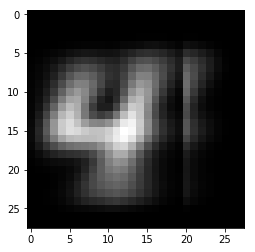

Prediction for test image is [8]


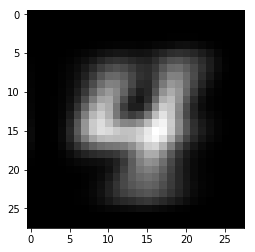

In [21]:
# Shift the image to left by 4 units
test_image_2 = test_image
for i in range(test_image.shape[0]):
  if i<20:
    test_image_2[:,i]=test_image[:,i+4]
    test_image_2 = np.clip(test_image_2,0, 1.0)
    
plt.imshow(test_image_2,cmap = 'gray')
plt.show()

plt.imshow(test_image,cmap = 'gray')

# Testing the translated image
# Reshape test image to feed into network
test_image_reshape = test_image_2.reshape(1,784)

Z = sess.run(output_layer, feed_dict = {X:test_image_reshape})
y_pred = np.argmax(Z, axis = 1)
print("Prediction for test image is {0}".format(y_pred))









